<a href="https://colab.research.google.com/github/timothywallaby/thinkfulchallenge/blob/master/BreastCancerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Python Datasets/breast-cancer-wisconsin.data', header=None)

In [4]:
# Check import
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
# Replace the column names
df.columns = ['id', 'thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 'marginal_adhesion', 'single_epith_cellsize', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'malignancy']

In [6]:
df.head()

,id,thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epith_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignancy
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
# Change the category of malignant tumors (4) into 1, and benign tumors (2) into 0.
df.malignancy = np.where(df.malignancy >= 3, 1, 0)

In [8]:
# Check to see if category changed from 4/2 to 1/0
df.head()

,id,thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epith_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignancy
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [9]:
# Check datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                       699 non-null int64
thickness                699 non-null int64
cell_size_uniformity     699 non-null int64
cell_shape_uniformity    699 non-null int64
marginal_adhesion        699 non-null int64
single_epith_cellsize    699 non-null int64
bare_nuclei              699 non-null object
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
malignancy               699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
# Change bare_nuclei from string to int object
df.bare_nuclei = pd.to_numeric(df.bare_nuclei, errors='coerce')

In [11]:
# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                       699 non-null int64
thickness                699 non-null int64
cell_size_uniformity     699 non-null int64
cell_shape_uniformity    699 non-null int64
marginal_adhesion        699 non-null int64
single_epith_cellsize    699 non-null int64
bare_nuclei              683 non-null float64
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
malignancy               699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [0]:
# Drop null values
dfdrop = df.dropna()

In [13]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                       683 non-null int64
thickness                683 non-null int64
cell_size_uniformity     683 non-null int64
cell_shape_uniformity    683 non-null int64
marginal_adhesion        683 non-null int64
single_epith_cellsize    683 non-null int64
bare_nuclei              683 non-null float64
bland_chromatin          683 non-null int64
normal_nucleoli          683 non-null int64
mitoses                  683 non-null int64
malignancy               683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [36]:
# Check for outliers
dfdrop.describe()

,id,thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epith_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignancy
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


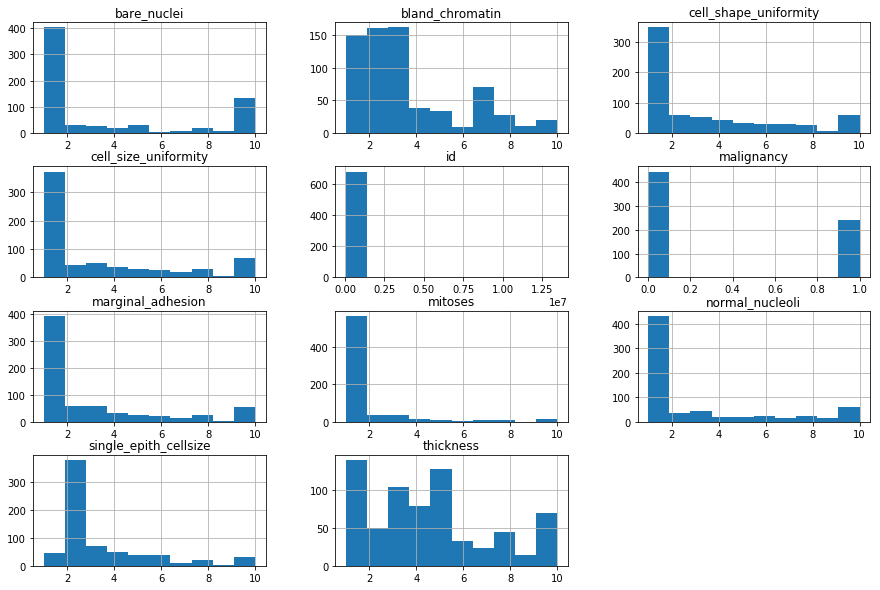

In [37]:
# Check distributions
dfdrop.hist(figsize=(15,10))
plt.show()

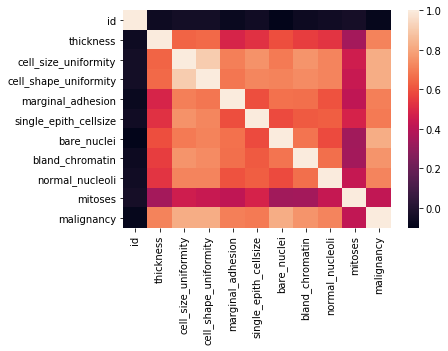

In [38]:
sns.heatmap(dfdrop.corr())
plt.show()

### List of classification methods to use
1. KNN
2. SVM
3. Decision Trees
4. Random Forest
5. Gradient Boosted DT

Naive Bayes is not great since there seems to be quite a lot of interdependancy between features.

Logistic Regression for classification is not good because features are not linear.

In [0]:
# Split the data into feature and label sets
X = dfdrop.iloc[:, ~df.columns.isin(['id', 'malignancy'])].values
Y = dfdrop['malignancy'].values

In [0]:
# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.9560975609756097


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[127   2]
 [  7  69]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       129
           1       0.97      0.91      0.94        76

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [0]:
#PRETTY FANTASTIC ACCURACY!